In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.multivariate.pca import PCA
import scipy.stats as stats

import yfinance as yf

In [2]:
asset1 = yf.download(tickers='SPY',period='max')
asset1['Adj Factor'] = asset1['Adj Close']/asset1['Close']
asset1['Adj Factor'] = asset1['Adj Factor']/asset1['Adj Factor'].iloc[0]
asset1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Adj Factor
Date,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.717392,1003200,1.000000
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.900299,480500,1.000000
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.955173,201300,1.000000
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.229542,529400,1.000000
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.339289,531500,1.000000
...,...,...,...,...,...,...,...
2021-10-15,444.750000,446.260010,444.089996,445.869995,445.869995,66226800,1.708474
2021-10-18,443.970001,447.549988,443.269989,447.190002,447.190002,62213200,1.708474
2021-10-19,448.920013,450.709991,448.269989,450.640015,450.640015,46996800,1.708474


In [3]:
asset2=yf.download(tickers='DIA',period='max')
asset2['Adj Factor'] = asset2['Adj Close']/asset2['Close']
asset2['Adj Factor'] = asset2['Adj Factor']/asset2['Adj Factor'].iloc[0]
asset2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Adj Factor
Date,,,,,,,
1998-01-20,77.812500,78.843750,77.406250,78.812500,47.259430,1744600,1.000000
1998-01-21,78.093750,78.375000,77.281250,77.843750,46.678539,1839600,1.000000
1998-01-22,77.187500,77.859375,76.937500,77.187500,46.284992,1662600,1.000000
1998-01-23,77.500000,77.750000,76.312500,77.000000,46.172573,1693700,1.000000
1998-01-26,77.375000,77.671875,76.937500,77.312500,46.360004,1172800,1.000001
...,...,...,...,...,...,...,...
2021-10-15,351.649994,353.079987,350.920013,352.850006,352.850006,4197800,1.667657
2021-10-18,351.339996,353.130005,350.250000,352.500000,352.500000,3310600,1.667657
2021-10-19,353.670013,354.510010,352.799988,354.459991,354.459991,2380900,1.667657


In [4]:
def generate_pair_price(stock1, stock2, price):
    price1 = stock1[price]
    price2 = stock2[price]
    price1.name = price + '1'
    price2.name = price + '2'
    pair = pd.DataFrame([price1, price2]).T.dropna()
    return pair

In [5]:
pair = generate_pair_price(asset1, asset2, 'Close')
pair

,Close1,Close2
Date,,
1998-01-20,97.875000,78.812500
1998-01-21,96.937500,77.843750
1998-01-22,96.078125,77.187500
1998-01-23,95.937500,77.000000
1998-01-26,95.875000,77.312500
...,...,...
2021-10-15,445.869995,352.850006
2021-10-18,447.190002,352.500000
2021-10-19,450.640015,354.459991


In [6]:
pair_train = pair[(pair.index > '2010-01-01') & (pair.index < '2013-01-01')]
pair_train

,Close1,Close2
Date,,
2010-01-04,113.330002,105.660004
2010-01-05,113.629997,105.489998
2010-01-06,113.709999,105.559998
2010-01-07,114.190002,105.940002
2010-01-08,114.570000,106.110001
...,...,...
2012-12-24,142.350006,130.970001
2012-12-26,141.750000,130.809998
2012-12-27,141.559998,130.600006


### OLS for pairs

In [7]:
ols_results = smf.ols('Close1 ~ Close2 ', data=pair_train).fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Close1   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.016e+04
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:09:20   Log-Likelihood:                -1492.5
No. Observations:                 754   AIC:                             2989.
Df Residuals:                     752   BIC:                             2998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1378      0.743     -2.878      0.0

In [8]:
r0 = ols_results.cov_params()
r0

,Intercept,Close2
Intercept,0.551822,-0.004622
Close2,-0.004622,0.000039


In [9]:
ols_results.mse_resid

3.0761253999899285

In [10]:
ols_results.resid

Date
2010-01-04    0.872335
2010-01-05    1.356713
2010-01-06    1.360796
2010-01-07    1.428658
2010-01-08    1.624281
                ...   
2012-12-24    2.441927
2012-12-26    2.015456
2012-12-27    2.053204
2012-12-28    2.182592
2012-12-31    2.924906
Length: 754, dtype: float64

In [11]:
V0 = sum(ols_results.resid**2)/(len(pair_train)-2)
V0

3.0761253999899316

In [12]:
theta0 = ols_results.params
theta0.values

array([-2.13778732,  1.08456795])

In [13]:
pair_test = pair[pair.index >= '2013-01-01']
pair_test

,Close1,Close2
Date,,
2013-01-02,146.059998,133.770004
2013-01-03,145.729996,133.630005
2013-01-04,146.369995,134.059998
2013-01-07,145.970001,133.509995
2013-01-08,145.550003,133.059998
...,...,...
2021-10-15,445.869995,352.850006
2021-10-18,447.190002,352.500000
2021-10-19,450.640015,354.459991


### Compute e and $\sqrt{Q}$

In [14]:
def generate_signal(pair, theta0, V0, R0, W, G):
    signal = pd.DataFrame(columns=['e','Q','theta1'],index=pair.index)
    time = pair.index
    V = V0
    for i in range(len(pair)):
        if i == 0:
            F = np.array([[1],[pair.Close2.iloc[i]]])
            y = pair.Close1.iloc[i]
            f = F.T @ theta0
            e = y - f
            Q = F.T @ R0 @ F + V
            A = R0 @ F @ (Q**(-1))
            C = R0 - A @ Q @ A.T
            m = theta0 + A @ e
            signal.theta1[time[i]] = theta0[1]
            signal.e[time[i]] = e[0]
            signal.Q[time[i]] = np.sqrt(Q[0][0])

        else:
            a = G @ m
            R = G @ C @ G.T + W
            F = np.array([[1],[pair.Close2.iloc[i]]])
            y = pair.Close1.iloc[i]
            f = F.T @ a
            e = y - f
            Q = F.T @ R @ F + V
            A = R @ F @ (Q**(-1))
            C = R - A @ Q @ A.T
            m = a + A @ e
            signal.theta1[time[i]] = a[1]
            signal.e[time[i]] = e[0]
            signal.Q[time[i]] = np.sqrt(Q[0][0])
    return signal

In [15]:
delta = 10**(-4)
W0 = np.eye(2)*delta*(1-delta)
signal = generate_signal(pair_test, theta0.values.T, 10, r0.values, W0, np.eye(2))
signal

,e,Q,theta1
Date,,,
2013-01-02,3.115125,3.164358,1.084568
2013-01-03,2.932894,3.434908,1.084753
2013-01-04,2.657872,3.651265,1.088221
2013-01-07,2.194946,3.776335,1.093261
2013-01-08,1.613354,3.838991,1.09822
...,...,...,...
2021-10-15,-0.940235,5.396602,1.271881
2021-10-18,1.441714,5.383101,1.27013
2021-10-19,1.452842,5.402331,1.272809


In [16]:
1 - ((signal.e>signal.Q).sum()+(signal.e<-signal.Q).sum())/1711

0.9964932787843367

In [17]:
1 - ((signal.e>2 * signal.Q).sum()+(signal.e<-2 * signal.Q).sum())/1711

1.0

In [18]:
1 - ((signal.e>3 * signal.Q).sum()+(signal.e<-3 * signal.Q).sum())/1711

1.0

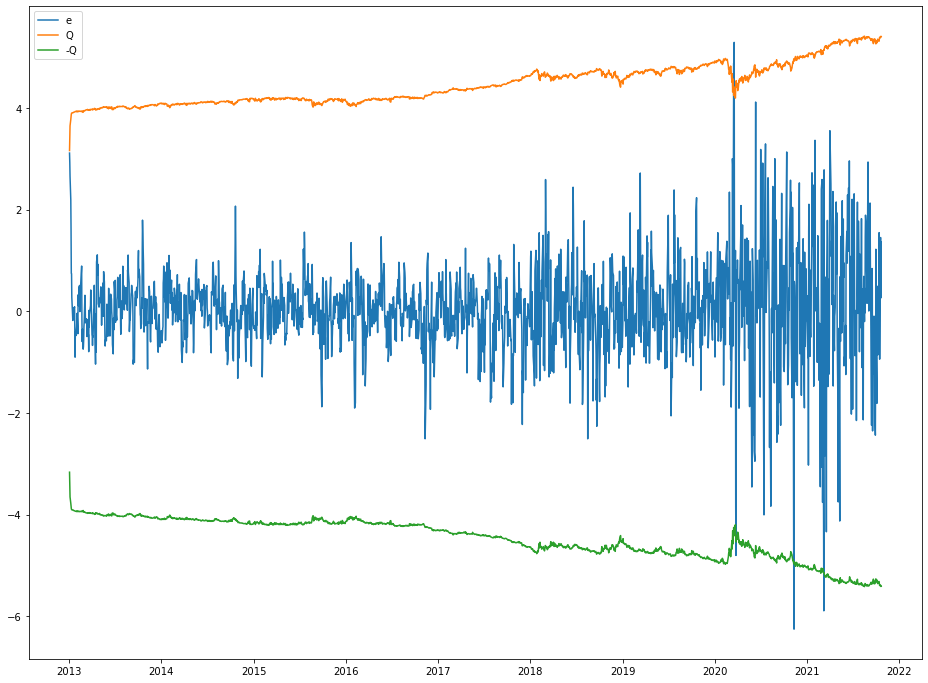

In [19]:
plt.figure(figsize = (16,12))
plt.plot(signal['e'])
plt.plot(signal['Q'])
plt.plot(-signal['Q'])
plt.legend(['e','Q','-Q'])

### Rolling regression to estimate W

In [20]:
def regression(pair):
    pair = pair.values
    y = pair.T[0]
    X = np.array([np.ones(len(y)),pair.T[1]]).T
    coeff = np.linalg.inv(X.T @ X)@ X.T @ y
    return coeff

In [21]:
pair_train = pair[(pair.index > '2010-01-01') & (pair.index < '2013-01-01')]
pair_train

,Close1,Close2
Date,,
2010-01-04,113.330002,105.660004
2010-01-05,113.629997,105.489998
2010-01-06,113.709999,105.559998
2010-01-07,114.190002,105.940002
2010-01-08,114.570000,106.110001
...,...,...
2012-12-24,142.350006,130.970001
2012-12-26,141.750000,130.809998
2012-12-27,141.559998,130.600006


In [22]:
coeffs = []
for df in pair_train.rolling(365, min_periods=365):
    if len(df) == 365:
        coeffs.append(regression(df))
coeffs = np.array(coeffs)
coeffs

array([[-7.37957470e+00,  1.13901926e+00],
       [-7.35864369e+00,  1.13879788e+00],
       [-7.33483156e+00,  1.13852738e+00],
       [-7.29314891e+00,  1.13808486e+00],
       [-7.23537671e+00,  1.13749091e+00],
       [-7.19690344e+00,  1.13707933e+00],
       [-7.15875322e+00,  1.13668163e+00],
       [-7.11582837e+00,  1.13626115e+00],
       [-7.07968654e+00,  1.13588977e+00],
       [-7.03643700e+00,  1.13545509e+00],
       [-6.98548867e+00,  1.13495679e+00],
       [-6.93802119e+00,  1.13449129e+00],
       [-6.87377639e+00,  1.13386523e+00],
       [-6.81968849e+00,  1.13331915e+00],
       [-6.77022857e+00,  1.13281803e+00],
       [-6.69790846e+00,  1.13209496e+00],
       [-6.61389164e+00,  1.13128492e+00],
       [-6.52920320e+00,  1.13046496e+00],
       [-6.41880728e+00,  1.12939788e+00],
       [-6.30189654e+00,  1.12828812e+00],
       [-6.18588118e+00,  1.12718016e+00],
       [-6.07131316e+00,  1.12607669e+00],
       [-5.96099543e+00,  1.12502759e+00],
       [-5.

In [23]:
W = np.cov(np.diff(coeffs, axis=0).T)
W

array([[ 1.56548147e-02, -1.32031592e-04],
       [-1.32031592e-04,  1.11578749e-06]])

In [24]:
signal = generate_signal(pair_test, theta0.values.T, V0, r0.values, W, np.eye(2))
signal

,e,Q,theta1
Date,,,
2013-01-02,3.115125,1.757636,1.084568
2013-01-03,2.923777,1.757656,1.085168
2013-01-04,3.084396,1.757877,1.08574
2013-01-07,3.267932,1.757746,1.086375
2013-01-08,3.32277,1.75765,1.087039
...,...,...,...
2021-10-15,-1.461922,1.885836,1.36033
2021-10-18,0.531331,1.884542,1.359484
2021-10-19,1.245049,1.886018,1.359789


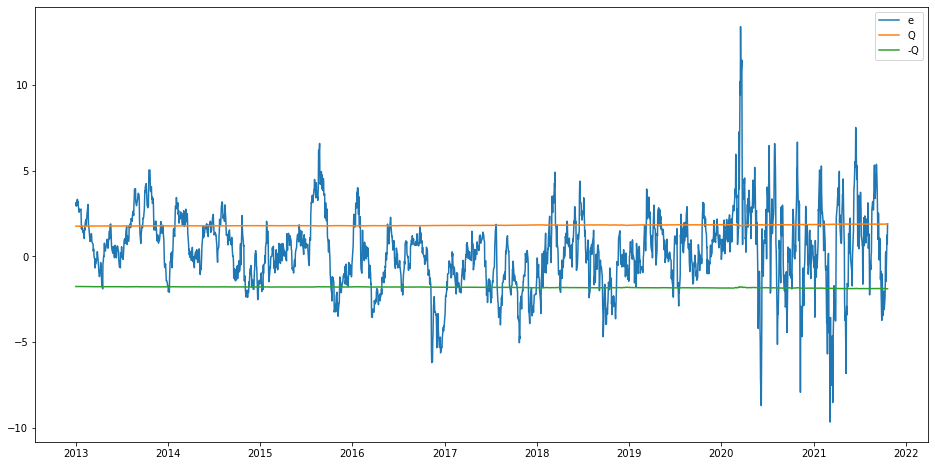

In [28]:
plt.figure(figsize = (16,8))
plt.plot(signal['e'])
plt.plot(signal['Q'])
plt.plot(-signal['Q'])
plt.legend(['e','Q','-Q'])

In [29]:
def compute_invested(cash, price1, price2, hedge_ratio, initial_margin_rate = 0.5, commission_rate = 0.0005, long=True):
    if long == True:
        x1 = np.floor(cash/(initial_margin_rate *(1+commission_rate)* (price1 + hedge_ratio * price2)))
        x2 = -np.floor(hedge_ratio * cash/(initial_margin_rate * (price1 + hedge_ratio * price2)))
    elif long == False:
        x1 = -np.floor(cash/(initial_margin_rate * (1+commission_rate)*(price1 + hedge_ratio * price2)))
        x2 = np.floor(hedge_ratio * cash/(initial_margin_rate * (price1 + hedge_ratio * price2)))
    else:
        x1 = 0
        x2 = 0
    return x1, x2

In [30]:
def compute_invested_fixed(hedge_ratio, fixed=200, long=True):
    if long == True:
        x1 = fixed
        x2 = -np.floor(hedge_ratio*fixed)
    elif long == False:
        x1 = -fixed
        x2 = np.floor(hedge_ratio* fixed)
    else:
        x1 = 0
        x2 = 0
    return x1, x2

In [31]:
def generate_strategy(signal, cash=10000000, commision=0.0005, margin_rate=0.25, initial_margin_rate = 1, interest = 0.00013):
    invested = 0
    strategy = pd.DataFrame(columns=['position1', 'position2', 'margin_account', 'margin', 'cash','total'],index=signal.index)
    time = signal.index
    margin_account = 0
    for i in range(1, len(signal)):
        if invested == 0:
            if signal.e.iloc[i-1] < -signal.Q.iloc[i-1]:
                invested = 1
                cash *= 1 + interest
                margin_account *= 1 + interest
                price1, price2 = asset1['Close'].loc[time[i]], asset2['Close'].loc[time[i]]
                hedge_ratio = signal.theta1.iloc[i-1]
                position1, position2 = compute_invested_fixed(hedge_ratio, fixed=200, long=True)
                adj1, adj2 = asset1['Adj Factor'].loc[time[i]], asset2['Adj Factor'].loc[time[i]]
                cash = cash - (price1 * position1 - price2 * position2) * initial_margin_rate * (1 + commision)
                margin_account = (price1 * position1 - price2 * position2) * initial_margin_rate
                initial_margin = margin_account
                margin = (price1 * position1 - price2 * position2) * margin_rate
                total = cash+margin_account
                strategy.position1[time[i]], strategy.position2[time[i]], strategy.margin_account[time[i]]\
                ,strategy.margin[time[i]], strategy.cash[time[i]], strategy.total[time[i]]\
                = position1, position2, margin_account, margin, cash, total
                print('Long', time[i])
                
                
            elif signal.e.iloc[i-1] > signal.Q.iloc[i-1]:
                invested = -1
                cash *= 1 + interest
                margin_account *= 1 + interest
                price1, price2 = asset1['Close'].loc[time[i]], asset2['Close'].loc[time[i]]
                hedge_ratio = signal.theta1.iloc[i-1]
                position1, position2 = compute_invested_fixed(hedge_ratio, fixed=200, long=False)
                adj1, adj2 = asset1['Adj Factor'].loc[time[i]], asset2['Adj Factor'].loc[time[i]]
                cash = cash - (-price1 * position1 + price2 * position2) * initial_margin_rate * (1 + commision)
                margin_account = (-price1 * position1 + price2 * position2) * initial_margin_rate
                initial_margin = margin_account
                margin = (-price1 * position1 + price2 * position2) * margin_rate
                total = cash+margin_account
                strategy.position1[time[i]], strategy.position2[time[i]], strategy.margin_account[time[i]]\
                ,strategy.margin[time[i]], strategy.cash[time[i]], strategy.total[time[i]]\
                = position1, position2, margin_account, margin, cash, total
                print('Short', time[i])

            else:
                cash *= 1 + interest
                margin_account *= 1 + interest
                strategy.position1[time[i]], strategy.position2[time[i]], strategy.margin_account[time[i]]\
                ,strategy.margin[time[i]], strategy.cash[time[i]], strategy.total[time[i]]\
                = 0, 0, 0, 0, cash, cash
        elif invested == 1:
            cash *= 1 + interest
            margin_account *= 1 + interest
            price1_, price2_ = asset1['Close'].loc[time[i]], asset2['Close'].loc[time[i]]
            adj1_, adj2_ = asset1['Adj Factor'].loc[time[i]], asset2['Adj Factor'].loc[time[i]]
            margin_account = initial_margin + (price1_ * adj1_/adj1-price1) * position1 + position2 * (price2_* adj2_/adj2 - price2)
            cash = cash
            total = cash + margin_account
            margin = (price1 * position1 - price2 * position2) * margin_rate
            if (signal.e.iloc[i-1] > -signal.Q.iloc[i-1]) | (margin_account < margin):
                invested = 0
                cash = cash + margin_account * (1 - commision)
                margin_account = 0
                position1, position2 = 0,0
                margin = 0
                total = cash + margin_account 
                print('Closing Long', time[i])
            strategy.position1[time[i]], strategy.position2[time[i]], strategy.margin_account[time[i]]\
            ,strategy.margin[time[i]], strategy.cash[time[i]], strategy.total[time[i]]\
                = position1, position2, margin_account, margin, cash, total
                
        elif invested == -1:
            cash *= 1 + interest
            margin_account *= 1 + interest
            price1_, price2_ = asset1['Close'].loc[time[i]], asset2['Close'].loc[time[i]]
            adj1_, adj2_ = asset1['Adj Factor'].loc[time[i]], asset2['Adj Factor'].loc[time[i]]
            margin_account = initial_margin + (price1_ * adj1_/adj1-price1) * position1 + position2 * (price2_* adj2_/adj2 - price2)
            cash = cash
            total = cash + margin_account
            margin = (-price1 * position1 + price2 * position2) * margin_rate
            
            if (signal.e.iloc[i-1] < signal.Q.iloc[i-1]) or (margin_account < margin):
                invested = 0
                cash = cash + margin_account * (1 - commision)
                margin_account = 0
                position1, position2 = 0,0
                margin = 0
                total = cash + margin_account
                print('Closing Short', time[i])
            strategy.position1[time[i]], strategy.position2[time[i]], strategy.margin_account[time[i]]\
            ,strategy.margin[time[i]], strategy.cash[time[i]], strategy.total[time[i]]\
                = position1, position2, margin_account, margin, cash, total
                

    return strategy                

In [32]:
strategy = generate_strategy(signal, cash=100000, commision=0.0005, margin_rate=0.25)
strategy

Short 2013-01-03 00:00:00
Closing Short 2013-01-25 00:00:00
Short 2013-01-28 00:00:00
Closing Short 2013-01-29 00:00:00
Short 2013-02-11 00:00:00
Closing Short 2013-02-22 00:00:00
Short 2013-02-25 00:00:00
Closing Short 2013-02-26 00:00:00
Long 2013-04-18 00:00:00
Closing Long 2013-04-22 00:00:00
Short 2013-05-20 00:00:00
Closing Short 2013-05-22 00:00:00
Short 2013-08-02 00:00:00
Closing Short 2013-08-05 00:00:00
Short 2013-08-06 00:00:00
Closing Short 2013-08-08 00:00:00
Short 2013-08-09 00:00:00
Closing Short 2013-09-13 00:00:00
Short 2013-09-23 00:00:00
Closing Short 2013-09-24 00:00:00
Short 2013-09-25 00:00:00
Closing Short 2013-11-08 00:00:00
Short 2013-11-11 00:00:00
Closing Short 2013-11-12 00:00:00
Short 2013-11-14 00:00:00
Closing Short 2013-11-19 00:00:00
Short 2013-12-04 00:00:00
Closing Short 2013-12-09 00:00:00
Short 2013-12-13 00:00:00
Closing Short 2013-12-16 00:00:00
Long 2014-01-06 00:00:00
Closing Long 2014-01-09 00:00:00
Short 2014-01-31 00:00:00
Closing Short 2014

,position1,position2,margin_account,margin,cash,total
Date,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-200,216.0,58010.0802,14502.52005,41973.91476,99983.99496
2013-01-04,-200,216.0,57974.942307,14502.52005,41979.371369,99954.313676
2013-01-07,-200,216.0,57936.145403,14502.52005,41984.828687,99920.97409
2013-01-08,-200,216.0,57922.938194,14502.52005,41990.286715,99913.224908
...,...,...,...,...,...,...
2021-10-15,0,0,0,0,107938.173752,107938.173752
2021-10-18,0,0,0,0,107952.205714,107952.205714
2021-10-19,0,0,0,0,107966.239501,107966.239501


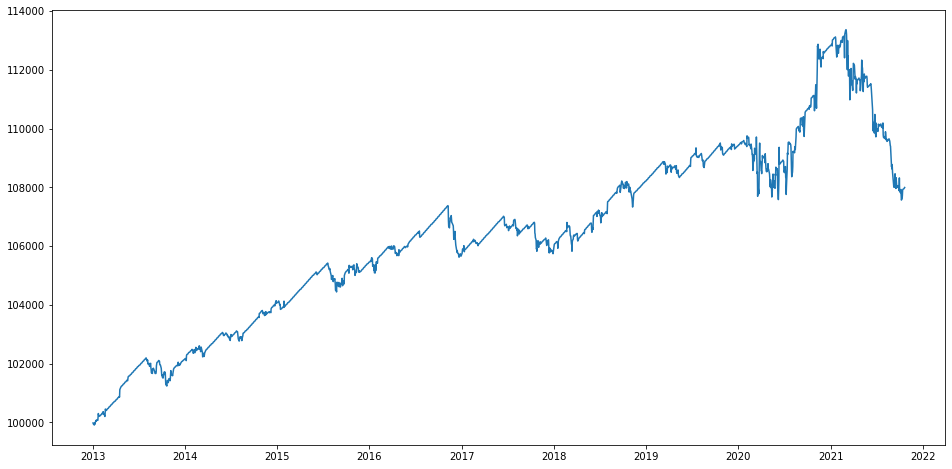

In [33]:
plt.figure(figsize=(16,8))
plt.plot(strategy.total)